In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 215 GB / percent used: 14.6 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'SRF'
var_LMDZ = 'frac_snow'

In [3]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    Areas                 (lat, lon) float32 ...
    Contfrac              (lat, lon) float32 ...
    frac_snow             (time_counter, lat, lon) float32 ...
Attributes:
    name:                      sechiba_history
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:18:17 GMT
    uuid:                      d3b693be-96c8-434a-b8a9-e01ff88717f5
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 18:09:32 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


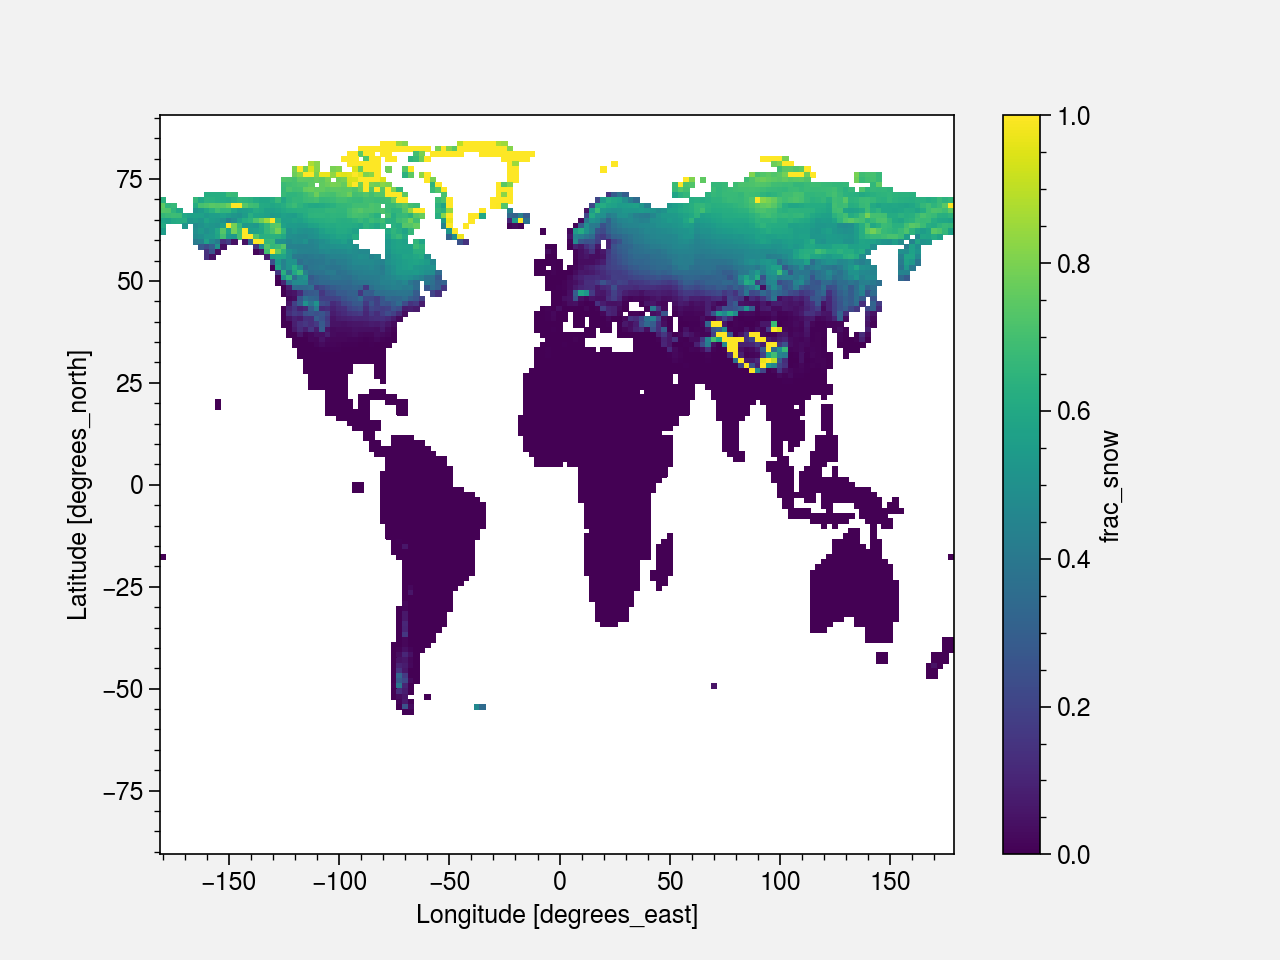

In [4]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

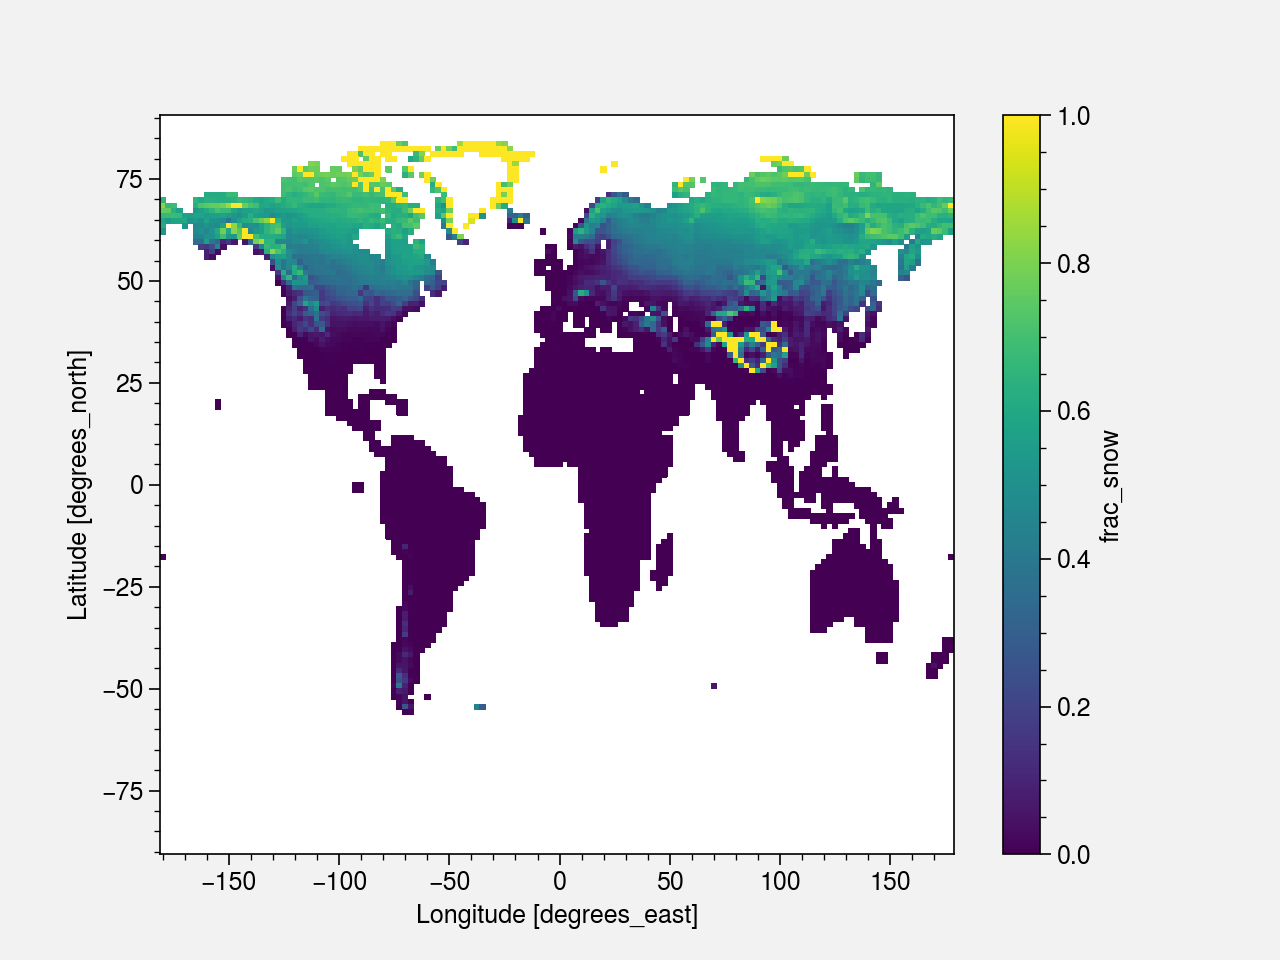

In [5]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20081231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

# Define period and zone

In [6]:
# Define common period
period = slice('1999','2008')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

# Get model data guided and not guided

In [7]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'})*100
model_guided.attrs['units'] = '%'
model_guided

<xarray.DataArray 'frac_snow' (time: 120, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_centered  (time) object ...
  * time           (time) object 1999-01-16 12:00:00 ... 2008-12-16 12:00:00
Attributes:
    units:    %

In [8]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20081231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'})*100
model.attrs['units'] = '%'
model

<xarray.DataArray 'frac_snow' (time: 120, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_centered  (time) object ...
  * time           (time) object 1999-01-16 12:00:00 ... 2008-12-16 12:00:00
Attributes:
    units:    %

# Compute climatologies

In [9]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [10]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load obs
## NOAA Climate Data Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00756

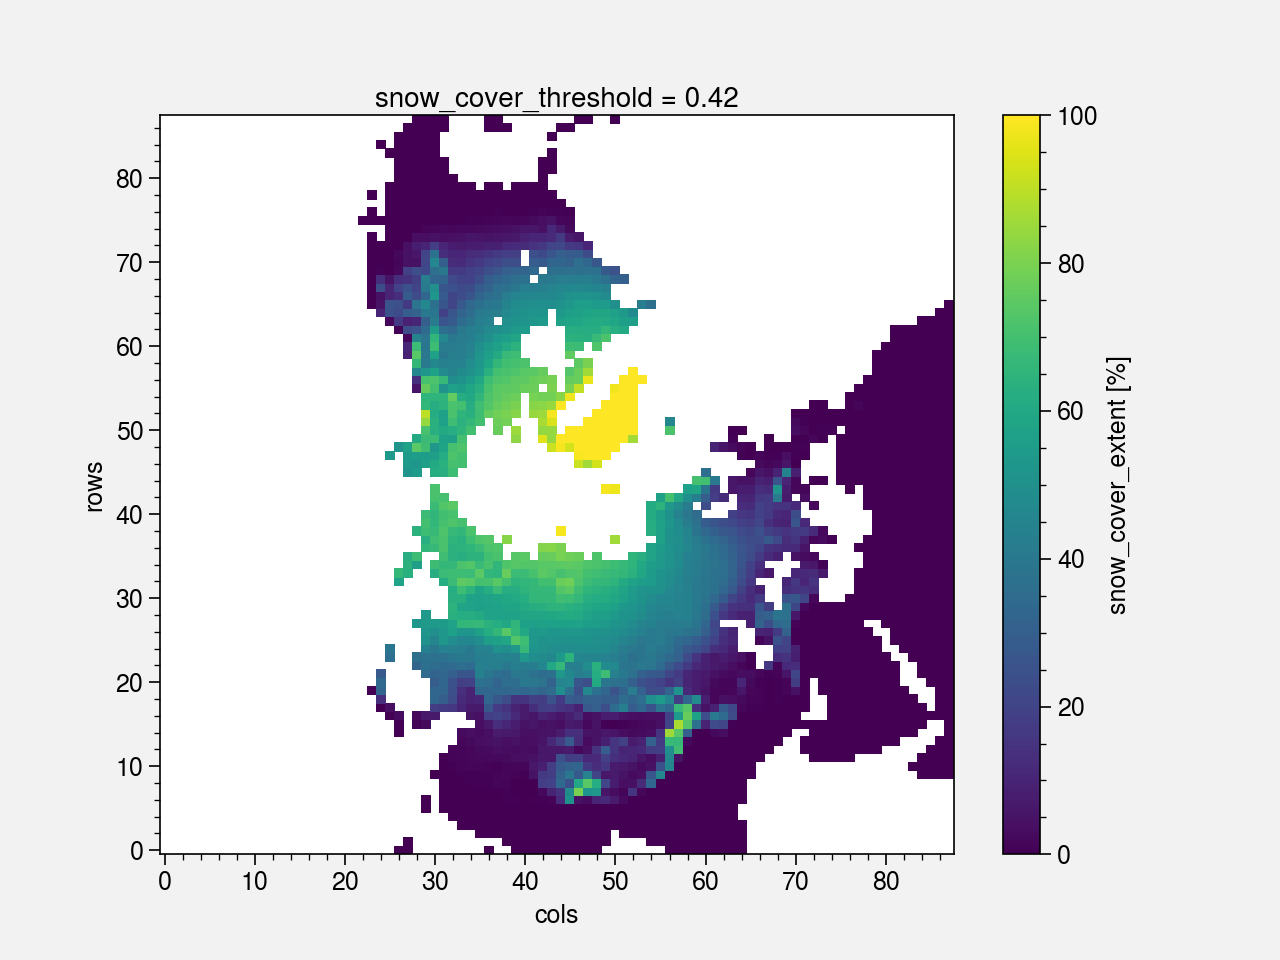

In [11]:
obs_longname = 'NOAA Climate Data Record (CDR) Version 1'
obs_name = 'NOAA CDR'

ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period).mean('time')
with xr.set_options(keep_attrs=True): # Get the snc variable, keep only land data and convert to %
    obs_clim = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100   
obs_clim.attrs['units'] = '%'
obs_clim = obs_clim.rename({'longitude': 'lon', 'latitude': 'lat'}) # Rename lon and lat for the regrid
# obs = obs.resample(time='1MS').mean('time', skipna='False', keep_attrs=True) # Resamble data per month (from per week)
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 
Value of cells in the new grid that are outside the old grid's domain #15 (https://github.com/JiaweiZhuang/xESMF/issues/15)

In [12]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=False, reuse_weights=True)
regridder = add_matrix_NaNs(regridder)
print(regridder)

# Regrid the data
obs_clim_regrid = regridder(obs_clim)

Reuse existing file: bilinear_88x88_143x144.nc


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_88x88_143x144.nc 
Reuse pre-computed weights? True 
Input grid shape:           (88, 88) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


# Plot differences

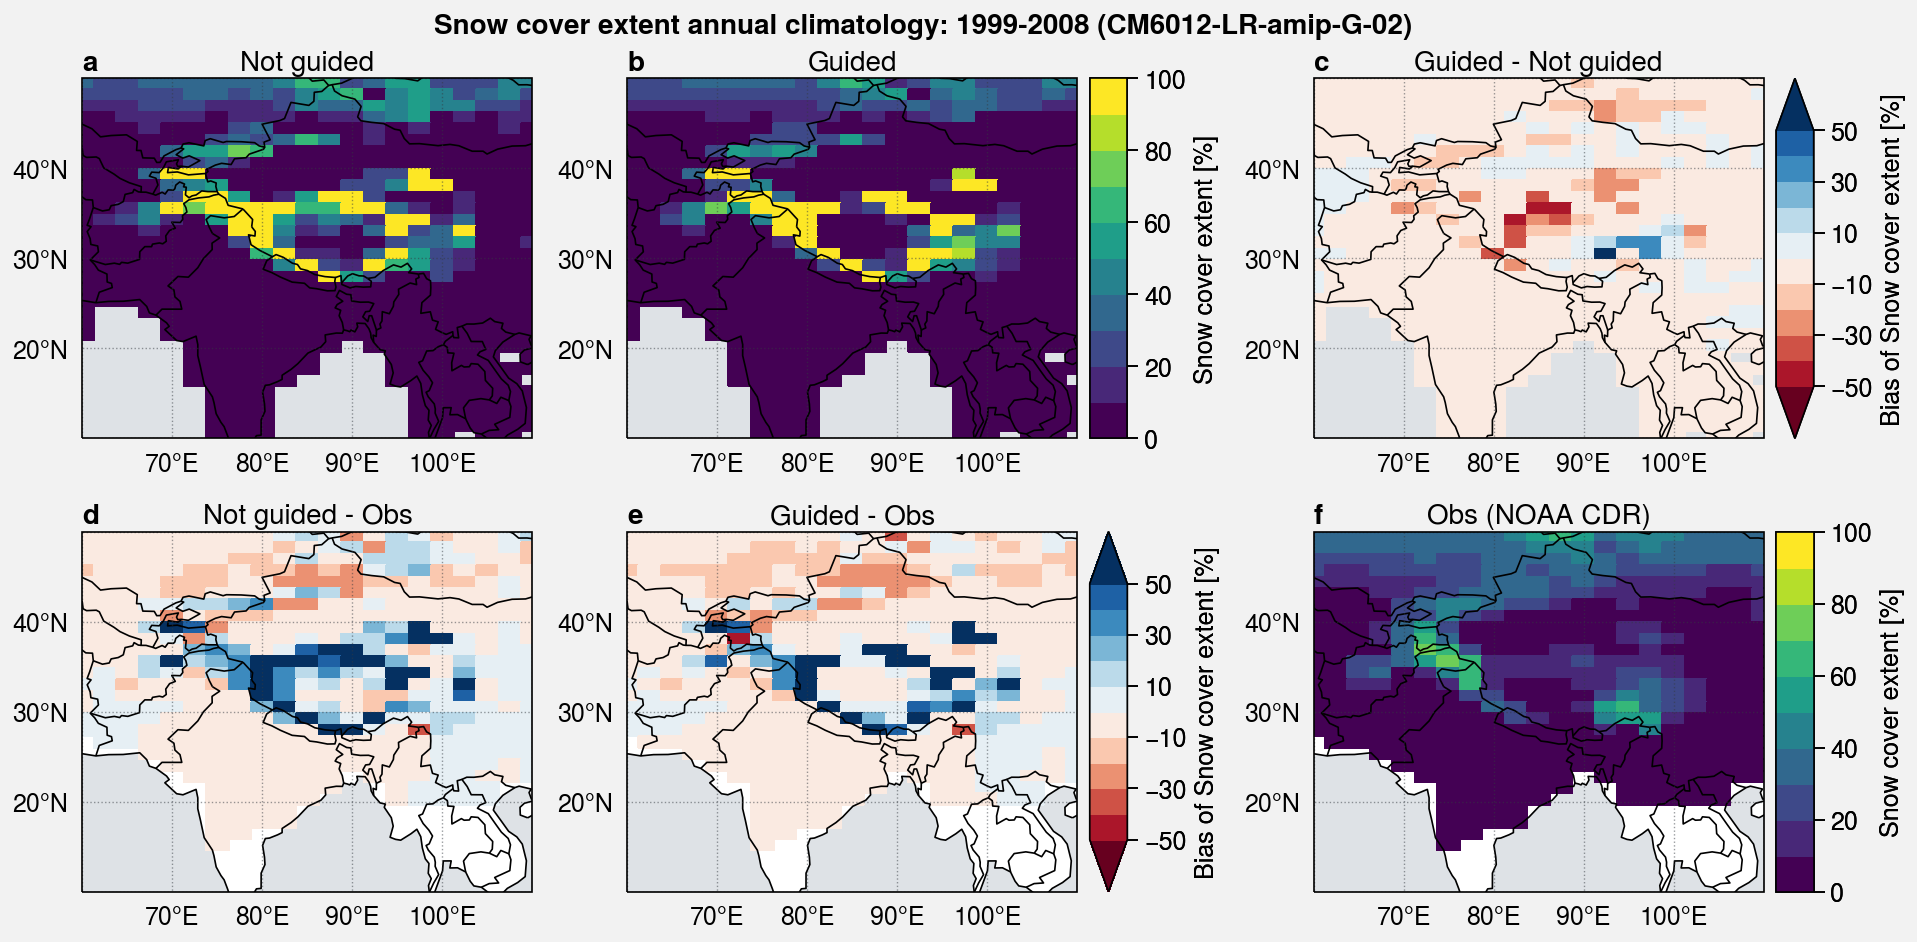

In [13]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-50,50,10)
cmap_dif = 'BuRd_r'
extend_diff = 'both'

# First row: differences guided / not guide
axs[0].pcolormesh(model_clim, cmap=cmap, levels=levels)
axs[0].format(title='Not guided')

m1 = axs[1].pcolormesh(model_guided_clim, cmap=cmap, levels=levels)
axs[1].format(title='Guided')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_guided_clim - model_clim, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title='Guided - Not guided')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title='Not guided - Obs')

axs[4].pcolormesh(model_guided_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title='Guided - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop+" (CM6012-LR-amip-G-02)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')